In [1]:
# Importe de librerías
import sqlite3
import pandas as pd

In [4]:
# Conectando con nuestra base de datos
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/finaljv/dataset/mibase.db')

In [5]:
cursor = conn.cursor()

# Crear tabla "whitewine" si no existe
cursor.execute('''
  CREATE TABLE IF NOT EXISTS whitewine (
    fixed_acidity FLOAT
    ,volatile_acidity FLOAT
    ,citric_acid FLOAT
    ,residual_sugar FLOAT
    ,chlorides FLOAT
    ,free_sulfur_dioxide FLOAT
    ,total_sulfur_dioxide FLOAT
    ,density FLOAT
    ,ph FLOAT
    ,sulphates FLOAT
    ,alcohol FLOAT
    ,quality INTEGER
  )
''')

# Consultamos si hay datos en la tabla "redwine"
cursor.execute("SELECT count(*) FROM whitewine")
contador = cursor.fetchone()[0]

# Si no hay datos en la tabla "redwine", los guardamos en ella utilizando un archivo csv
if contador == 0:
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/finaljv/dataset/winequality-white-db.csv', sep=';')
  df.to_sql('whitewine', conn, if_exists='append', index=False)


In [6]:
# Cargamos un dataframe con los datos almacenados en la base
dfdb = pd.read_sql("SELECT * FROM whitewine", conn)

# Cargar un dataframe desde un archivo csv
dfcsv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/finaljv/dataset/winequality-white-csv.csv', sep=';')

# Fusionar los dataframes
dataframe = pd.concat([dfdb, dfcsv], axis=0)

muy_malo = dataframe[dataframe["quality"] <= 4].shape[0]
malo = dataframe[dataframe["quality"] == 5].shape[0]
aceptables = dataframe[dataframe["quality"] == 6].shape[0]
buenos = dataframe[dataframe["quality"] >= 7].shape[0]

valores = {'muy_malo':[muy_malo], 'malo':[malo], 'aceptables':[aceptables], 'buenos':[buenos]}
data_grafdf = pd.DataFrame(data=valores)
#print(data_grafdf)

# dataframe.to_csv('vino.csv', sep=';', index=False, encoding='utf-8')
#valor_min_col1 = dataframe['alcohol'].min()
#valor_max_col1 = dataframe['alcohol'].max()
#print(valor_min_col1 ,"-", valor_max_col1)
#print(valor_max_col1)


In [7]:
feature_columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','ph','sulphates','alcohol']
X = dataframe.loc[:, feature_columns]
y = dataframe.loc[:, 'quality']

In [8]:
# Dividir los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier  # Usa RandomForestRegressor para regresión

# Crear el modelo
model = RandomForestClassifier(n_estimators=100, random_state=21)

# Entrenar
model.fit(X_train.values, y_train.values)

from sklearn.metrics import accuracy_score, classification_report

# Predecir
y_pred = model.predict(X_test.values)

# Evaluar
print("Accuracy:", accuracy_score(y_test, y_pred))

#nueva_prediccion = model.predict([[6.6,0.36,0.29,1.6,0.021,24,85,0.98965,3.41,0.61,12.4]]) #calidad 9
#nueva_prediccion = model.predict([[6.6,0.36,0.29,1.6,0.021,24,85,0.98965,3.41,0.61,12.4]]) #calidad 9
#nueva_prediccion = model.predict([[5.2,0.44,0.04,1.4,0.036,43,119,0.9894,3.36,0.33,12.1]]) #calidad 8
#nueva_prediccion = model.predict([[7.5,0.17,0.32,1.7,0.04,51,148,0.9916,3.21,0.44,11.5]]) #calidad 7
#nueva_prediccion = model.predict([[7.1,0.3,0.46,1.5,0.066,29,133,0.9906,3.12,0.54,12.7]]) #calidad 6
#nueva_prediccion = model.predict([[5.9,0.23,0.3,12.9,0.054,57,170,0.9972,3.28,0.39,9.4]]) #calidad 5
#nueva_prediccion = model.predict([[7.6,0.48,0.37,0.8,0.037,4,100,0.9902,3.03,0.39,11.4]]) #calidad 4
#nueva_prediccion = model.predict([[7.1,0.32,0.32,11,0.038,16,66,0.9937,3.24,0.4,11.5]]) #calidad 3

#print(nueva_prediccion[0])

Accuracy: 0.6938775510204082


https://5000-m-s-2qxg3564j7004-a.us-east4-0.prod.colab.dev
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [25/May/2025 07:29:32] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/May/2025 07:29:33] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/May/2025 07:29:38] "POST /clasificar HTTP/1.1" 200 -


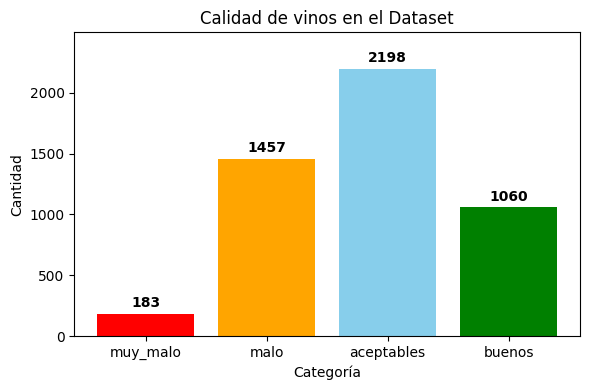

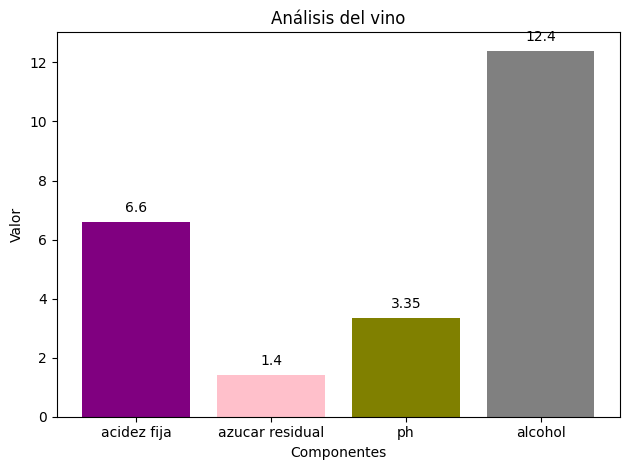

In [10]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

from flask import Flask, render_template,request,jsonify
app = Flask(__name__, template_folder='/content/drive/MyDrive/Colab Notebooks/finaljv/templates/')
@app.route("/")
def home():
    return render_template('index.html')


@app.route('/clasificar', methods=['POST'])  # Solo acepta solicitudes POST
def clasificar():
    if request.method == 'POST':
        uno = request.form['acidez_fija']
        dos = request.form['acidez_volatil']
        tres = request.form['acido_citrico']
        cuatro = request.form['azucar_residual']
        cinco = request.form['cloruros']
        seis = request.form['so2_libre']
        siete = request.form['so2_total']
        ocho = request.form['densidad']
        nueve = request.form['ph']
        diez = request.form['sulfatos']
        once = request.form['alcohol']

        # Se imprime el mensaje recibido para depuración
        #print(uno,",",dos,",",tres,",",cuatro,",",cinco,",",seis,",",siete,",",ocho,",",nueve,",",diez,",",once)

        # Realizamos la predicción
        nueva_prediccion = model.predict([[uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once]])

        response = {
              'acidez_fija':uno
              ,'acidez_volatil':dos
              ,'acido_citrico':tres
              ,'azucar_residual':cuatro
              ,'cloruros':cinco
              ,'dioxido_sulfurico_libre':seis
              ,'dioxido_sulfurico_total':siete
              ,'densidad':ocho
              ,'ph':nueve
              ,'sulfatos':diez
              ,'alcohol':once
              ,'color': color(nueva_prediccion[0])
              ,'calidad':calidad(nueva_prediccion[0])
              ,'img_dataset':grafica_1()
              ,'img_ingresos':ingresos(af=uno,ar=cuatro,ph=nueve,alc=once)
        }

        # Devuelve la predicción como respuesta JSON
        return render_template('results.html',datos=response)

# Función para determinar la calidad del vino
def calidad(q):
  if q <= 4:
    return f'({q}) Muy Malo'
  elif q == 5:
    return f'({q}) Malo'
  elif q == 6:
    return f'({q}) Aceptable'
  elif q >= 7:
    return f'({q}) Bueno'

def color(q):
  if q <= 4:
    return '#9a0202'
  elif q == 5:
    return '#fe6102'
  elif q == 6:
    return '#006ea9'
  elif q >= 7:
    return '#108100'

#Función para graficar los datos ingresados desde la interfaz
def ingresos(af,ar,ph,alc):
  import matplotlib.pyplot as plt
  from io import BytesIO
  import base64

  # Datos de ejemplo
  categorias = ['acidez fija', 'azucar residual','ph','alcohol']
  #valores = [af, ar,ph,alc]
  valores = [float(af), float(ar),float(ph),float(alc)]
  colores = ['purple', 'pink', 'olive','gray']

  # Crear la figura y el eje
  fig, ax = plt.subplots()

  # Graficar barras
  barras = ax.bar(categorias, valores, color=colores)

  # Agregar los valores encima de cada barra
  for barra in barras:
      altura = barra.get_height()
      ax.annotate(f'{altura}',
                  xy=(barra.get_x() + barra.get_width() / 2, altura),
                  xytext=(0, 5),  # Desplazamiento vertical del texto
                  textcoords="offset points",
                  ha='center', va='bottom')

  # Títulos y etiquetas
  ax.set_title('Análisis del vino')
  ax.set_ylabel('Valor')
  ax.set_xlabel('Componentes')

  # Mostrar la gráfica
  plt.tight_layout()

  img = BytesIO()
  plt.savefig(img,format='png')
  img.seek(0)

  return base64.b64encode(img.getvalue()).decode('utf8')



#Función para graficar la cantidad de vino en el datset
def grafica_1():
  import matplotlib.pyplot as plt
  from io import BytesIO
  import base64

  # Extraer los nombres de las categorías y sus valores
  categorias = data_grafdf.columns.tolist()
  frecuencias = data_grafdf.iloc[0].tolist()

  # Crear el gráfico de barras
  plt.figure(figsize=(6, 4))
  colores = ['red', 'orange', 'skyblue','green']
  barras = plt.bar(categorias, frecuencias, color=colores)

  # Agregar valores numéricos encima de cada barra
  for barra in barras:
      altura = barra.get_height()
      plt.text(barra.get_x() + barra.get_width() / 2, altura + 30, str(altura),
              ha='center', va='bottom', fontsize=10, fontweight='bold')

  # Título y etiquetas de ejes
  plt.title("Calidad de vinos en el Dataset")
  plt.xlabel("Categoría")
  plt.ylabel("Cantidad")
  plt.ylim(0, max(frecuencias) + 300)  # Ajustar el límite superior del eje Y para que el texto no se corte

  # Mostrar el gráfico
  plt.tight_layout()

  img = BytesIO()
  plt.savefig(img,format='png')
  img.seek(0)

  return base64.b64encode(img.getvalue()).decode('utf8')


if __name__ == "__main__":
    app.run()


In [ ]:
# Líneas para realizar un INSERT
#cursor = conn.cursor()
#cursor.execute("INSERT INTO clientes (nombre, edad) VALUES ('Jorge', 38)")
#conn.commit()

In [ ]:
# Líneas para hacer consulta desde base de datos
#cursos = conn.cursor()
#cursor.execute("SELECT * FROM clientes")
#resultados = cursor.fetchall()

#for fila in resultados:
#    print(fila)